# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


In [4]:
cities

['adamstown',
 'east london',
 'jwaneng',
 'strezhevoy',
 'tazovsky',
 'geraldton',
 'edinburgh of the seven seas',
 'bouarfa',
 'blackmans bay',
 'argostolion',
 'bandarbeyla',
 'mashhad',
 'vilyuchinsk',
 'whitehorse',
 'grytviken',
 'aasiaat',
 'nova sintra',
 'hawaiian paradise park',
 'atafu village',
 'yellowknife',
 'bechar',
 'razole',
 'usogorsk',
 'stanley',
 'waitangi',
 'weno',
 'newman',
 'ust-nera',
 'pisco',
 'kuqa',
 'papatowai',
 'lae',
 'colonia',
 'kerikeri',
 'bay roberts',
 'nampula',
 'afgooye',
 'port-aux-francais',
 'yokadouma',
 'collie',
 'puerto natales',
 'fort bragg',
 'ribeira grande',
 'chateau-du-loir',
 'dudinka',
 'chonchi',
 'mezica',
 'oliver',
 'vernon',
 'i-n-salah',
 'chaiya',
 'hihifo',
 'margaret river',
 'dossor',
 'kristiansund',
 'puerto ayora',
 'yinchuan',
 'carbonear',
 'macenta',
 'iskateley',
 'anadyr',
 'nebbi',
 'vila velha',
 'la gi',
 "nar'yan-mar",
 'pathein',
 'yangor',
 'hermanus',
 'antsiranana',
 'mejit',
 'ribeira brava',
 'san

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
city_weather = city_weather = (requests.get(city_url)).json()
city_weather

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds =  city_weather['clouds']['all']
        city_wind =  city_weather['wind']['speed']
        city_country =  city_weather['sys']['country']
        city_date =  city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | jwaneng
Processing Record 4 of Set 1 | strezhevoy
Processing Record 5 of Set 1 | tazovsky
Processing Record 6 of Set 1 | geraldton
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | bouarfa
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | argostolion
Processing Record 11 of Set 1 | bandarbeyla
Processing Record 12 of Set 1 | mashhad
Processing Record 13 of Set 1 | vilyuchinsk
Processing Record 14 of Set 1 | whitehorse
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | aasiaat
Processing Record 17 of Set 1 | nova sintra
Processing Record 18 of Set 1 | hawaiian paradise park
Processing Record 19 of Set 1 | atafu village
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | bechar
Processing Record 22 of Se

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,17.40,88,100,3.79,PN,1693359195
1,east london,-33.0153,27.9116,18.75,31,5,2.90,ZA,1693359195
2,jwaneng,-24.6004,24.7303,8.37,66,4,3.81,BW,1693359196
3,strezhevoy,60.7333,77.5889,14.29,81,100,1.79,RU,1693359015
4,tazovsky,67.4667,78.7000,8.79,71,100,5.21,RU,1693359196


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,17.40,88,100,3.79,PN,1693359195
1,east london,-33.0153,27.9116,18.75,31,5,2.90,ZA,1693359195
2,jwaneng,-24.6004,24.7303,8.37,66,4,3.81,BW,1693359196
3,strezhevoy,60.7333,77.5889,14.29,81,100,1.79,RU,1693359015
4,tazovsky,67.4667,78.7000,8.79,71,100,5.21,RU,1693359196


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

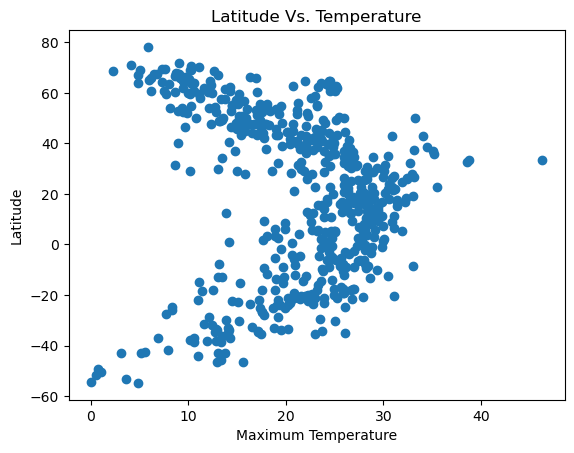

In [28]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Maximum Temperature")
plt.ylabel("Latitude")
plt.title("Latitude Vs. Temperature")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

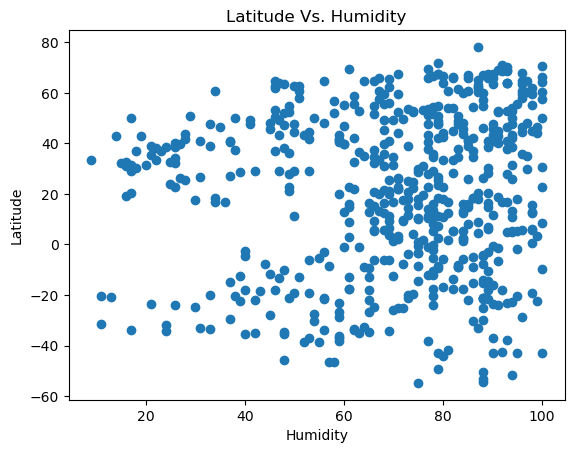

In [30]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.title("Latitude Vs. Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

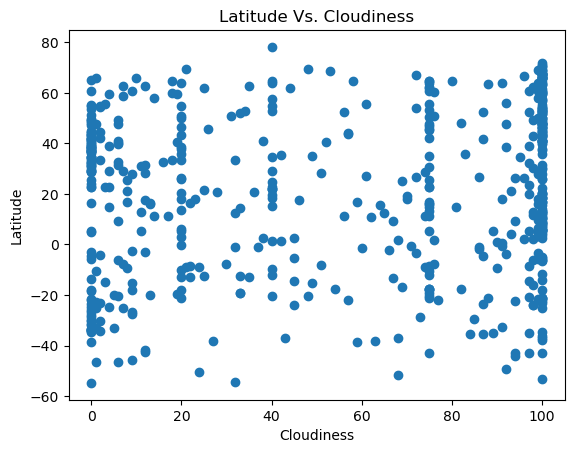

In [31]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.title("Latitude Vs. Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

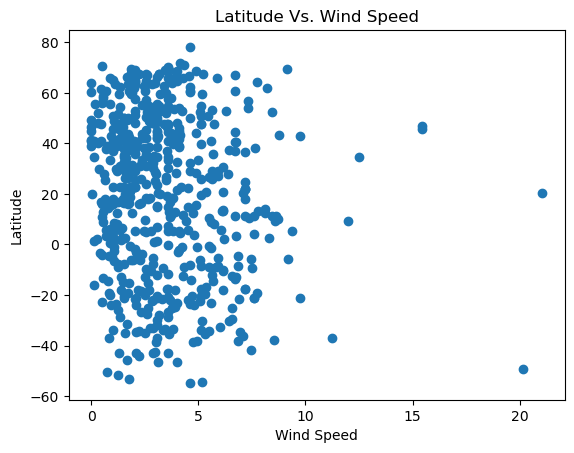

In [32]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.title("Latitude Vs. Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    
    plt.plot(x, regress_values, "r-")
    print(f"The r-value is: {rvalue**2}")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,strezhevoy,60.7333,77.5889,14.29,81,100,1.79,RU,1693359015
4,tazovsky,67.4667,78.7000,8.79,71,100,5.21,RU,1693359196
7,bouarfa,32.5300,-1.9500,21.55,25,6,4.02,MA,1693359197
9,argostolion,38.1811,20.4890,26.53,48,0,7.66,GR,1693359198
10,bandarbeyla,9.4942,50.8122,26.79,66,6,11.98,SO,1693359198


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,17.40,88,100,3.79,PN,1693359195
1,east london,-33.0153,27.9116,18.75,31,5,2.90,ZA,1693359195
2,jwaneng,-24.6004,24.7303,8.37,66,4,3.81,BW,1693359196
5,geraldton,-28.7667,114.6000,19.23,59,0,3.60,AU,1693359197
6,edinburgh of the seven seas,-37.0676,-12.3116,10.56,59,68,11.25,SH,1693359197


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.46635633847339675


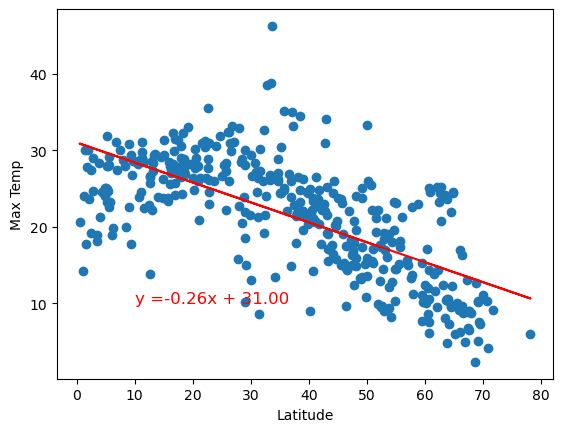

In [18]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, 10))


The r-value is: 0.5631614358143636


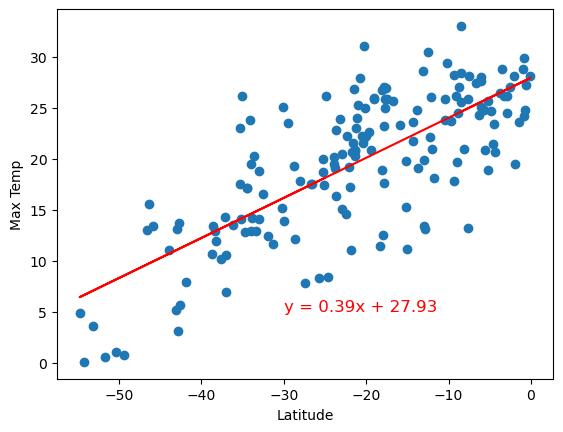

In [19]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-30, 5))

**Discussion about the linear relationship:** 
Northern Hemisphere - There is a strong negative and linear association between Latitude and Maximum Temperature.
Southern Hemispehere - There is a weak posotive and linear associaiton between Latitude and Maximum Temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0014926068155003986


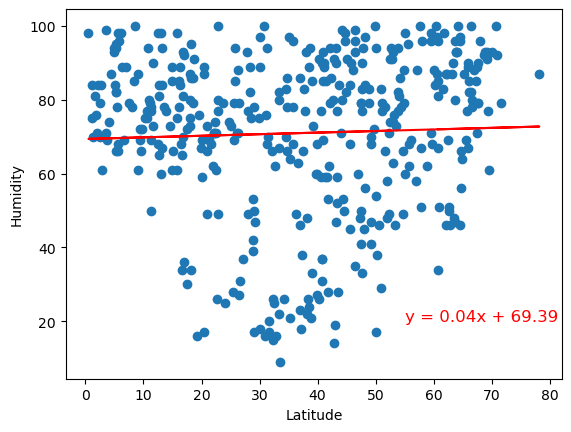

In [20]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (55, 20))


The r-value is: 0.007642008848044769


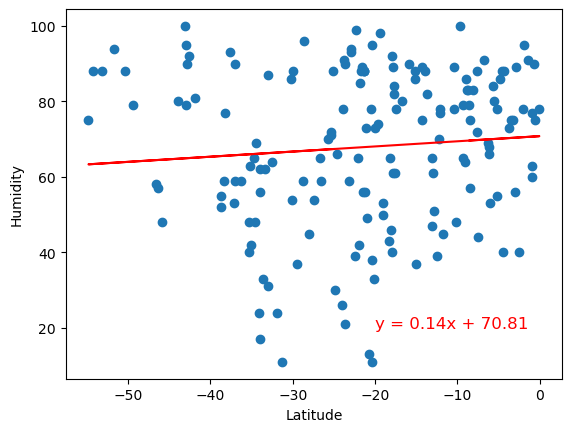

In [22]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-20, 20))


**Discussion about the linear relationship:** 
Northern Hemisphere - There is no association between Latitude and Humidity.
Southern Hemispehere - There is no association between Latitude and Humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0005372897026498249


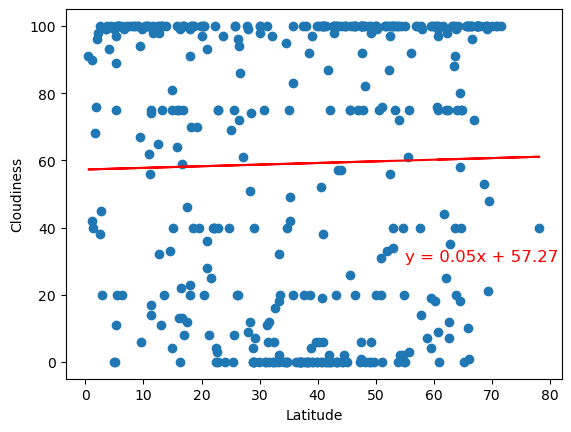

In [23]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (55, 30))


The r-value is: 0.009487508625178118


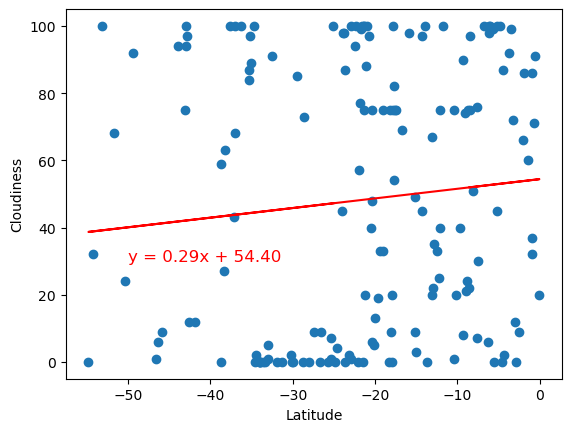

In [24]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50, 30))


**Discussion about the linear relationship:** 
Northern Hemisphere - There is no association between Latitude and Cloudiness.
Southern Hemispehere - There is weak positive and a non-linear association between Latitude and Cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.006308743353786522


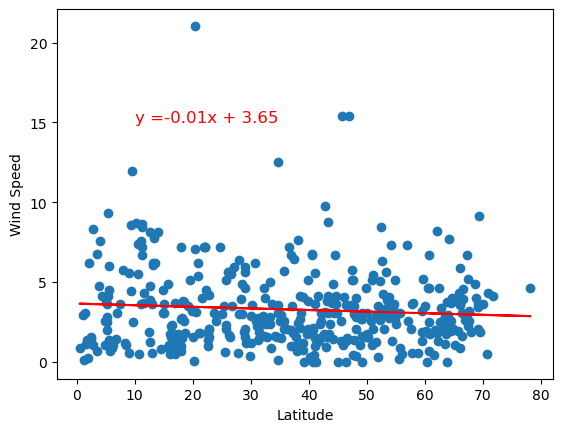

In [25]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (10, 15))


The r-value is: 0.008126760141256737


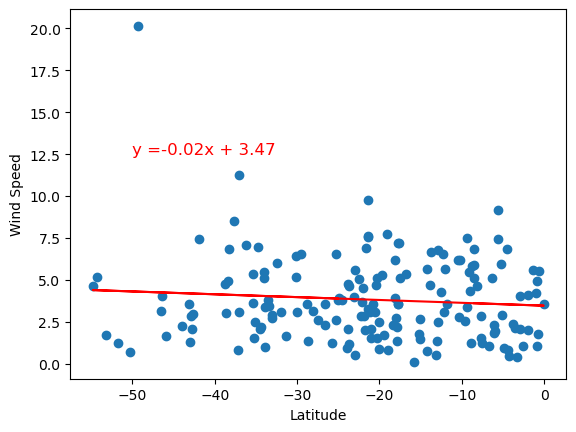

In [26]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 12.5))


**Discussion about the linear relationship:** 
Northern Hemisphere - There is a weak negative and a linear, with some outliers, association between Latitude and Wind Speed.
Southern Hemispehere - There is a weak negative and a linear, with some outliers, association between Latitude and Wind Speed.